# Digit Recognizer Competition

In this notebook, we will build a simple neural network model to recognize handwritten digits using the MNIST dataset. We will follow these steps:

1. Introduction and Setup
2. Data Preprocessing
3. Build a Model
4. Train the Model
5. Evaluate the Model
6. Make Predictions
7. Submit the Results

Let's get started!

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

# Load the data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Display the first few rows of the training data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

Before we build our model, we need to preprocess the data. This involves normalizing the pixel values, reshaping the data, and splitting it into training and validation sets.

In [3]:
# Normalize the data
X_train = train.drop('label', axis=1).values / 255.0
y_train = train['label'].values

# Reshape the data to fit the model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = test.values.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Display the shape of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (37800, 28, 28, 1)
Validation data shape: (4200, 28, 28, 1)
Test data shape: (28000, 28, 28, 1)


## Build a Model

We will build a simple Convolutional Neural Network (CNN) using Keras.

In [5]:
# Define the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

We will now train the model on the training data and validate it on the validation data.

Epoch 1/10
296/296 - 19s - 66ms/step - accuracy: 0.8455 - loss: 0.4854 - val_accuracy: 0.9621 - val_loss: 0.1296
Epoch 2/10
296/296 - 17s - 58ms/step - accuracy: 0.9536 - loss: 0.1526 - val_accuracy: 0.9764 - val_loss: 0.0729
Epoch 3/10
296/296 - 20s - 67ms/step - accuracy: 0.9652 - loss: 0.1166 - val_accuracy: 0.9817 - val_loss: 0.0577
Epoch 4/10
296/296 - 21s - 71ms/step - accuracy: 0.9715 - loss: 0.0942 - val_accuracy: 0.9848 - val_loss: 0.0481
Epoch 5/10
296/296 - 20s - 69ms/step - accuracy: 0.9762 - loss: 0.0790 - val_accuracy: 0.9855 - val_loss: 0.0415
Epoch 6/10
296/296 - 17s - 57ms/step - accuracy: 0.9792 - loss: 0.0693 - val_accuracy: 0.9867 - val_loss: 0.0390
Epoch 7/10
296/296 - 21s - 71ms/step - accuracy: 0.9811 - loss: 0.0632 - val_accuracy: 0.9883 - val_loss: 0.0387
Epoch 8/10
296/296 - 20s - 66ms/step - accuracy: 0.9820 - loss: 0.0577 - val_accuracy: 0.9890 - val_loss: 0.0328
Epoch 9/10
296/296 - 17s - 57ms/step - accuracy: 0.9830 - loss: 0.0548 - val_accuracy: 0.9886 - 

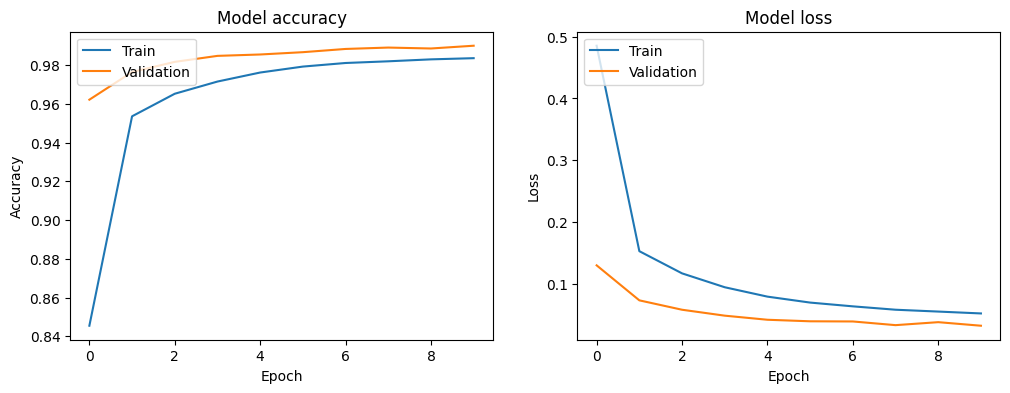

In [6]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), verbose=2)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Evaluate the Model

Let's evaluate the model's performance on the validation data.

In [7]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation accuracy: {val_acc:.4f}')
print(f'Validation loss: {val_loss:.4f}')

Validation accuracy: 0.9900
Validation loss: 0.0318


In [8]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Prepare the submission file
submission = pd.DataFrame({'ImageId': list(range(1, len(predictions) + 1)), 'Label': predictions})
submission.to_csv('submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
